In [1]:
#|default_exp apps


from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
import os

In [4]:
ims = search_images_ddg('grizzly bear',max_images=100)

len(ims)

100

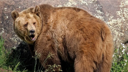

In [17]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(128,128)

In [27]:
#|export

bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [31]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=search_images_ddg(f'{o} bear'))

In [8]:
fns = get_image_files(path)
len(fns)

0

In [36]:
failed = verify_images(fns)
len(failed)

5

In [35]:
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [28]:
#|export

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

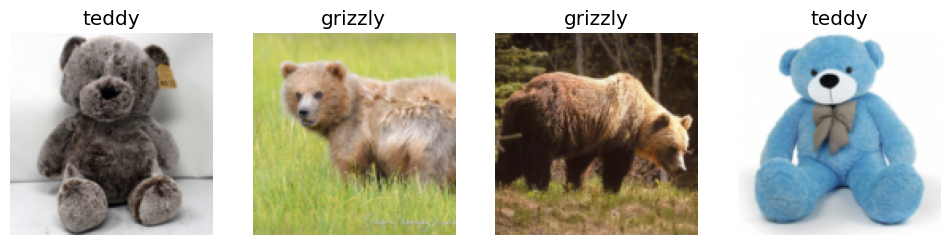

In [9]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

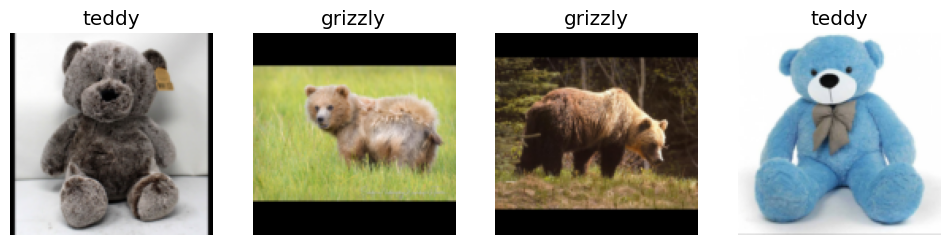

In [29]:
#|export

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))

dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [30]:
#|export

bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [61]:
# learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(4)

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


ValueError: not enough values to unpack (expected 3, got 2)

In [15]:
interp.plot_top_losses(5, nrows=1)

AttributeError: 'list' object has no attribute 'topk'

In [64]:
cleaner = ImageClassifierCleaner(learn)
cleaner

ValueError: not enough values to unpack (expected 4, got 3)

In [31]:
#|export

import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath



learn = load_learner('model_bears')
learn.predict('bears/black/004685f9-b3b2-4328-a984-c24c95360c6b.jpg')

('black', TensorBase(0), TensorBase([9.9960e-01, 3.9762e-04, 1.1976e-06]))

In [17]:
learn.dls.vocab

['black', 'grizzly', 'teddy']

In [18]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
#|export

btn_upload = SimpleNamespace(data = ['bears/black/004685f9-b3b2-4328-a984-c24c95360c6b.jpg'])
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
    

out_pl

Output()

In [33]:
#|export

pred,pred_idx,probs = learn.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black; Probability: 0.9996')

In [34]:
#|export
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [36]:
import nbdev
nbdev.export.nb_export('leasen2.ipynb', 'apps')
print('Export successful')

Export successful
